In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.tsa.seasonal as seasonal
import statsmodels.tsa.holtwinters as hw
import locale
import matplotlib.patches as mpatches
import requests
import io
import datetime as dt
import numpy as np

In [2]:
def char_range(c1, n):
    """Generates the characters from `c1` to `c2`, inclusive."""
    for c in range(ord(c1), ord(c1)+n):
        yield chr(c)
list(char_range('a',5))

['a', 'b', 'c', 'd', 'e']

In [6]:
locale.setlocale(locale.LC_ALL, 'de_DE')
today = dt.datetime.today().strftime("%-d. %B 2020")
today

'1. August 2020'

In [84]:
r = requests.get(r'https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Projekte_RKI/Nowcasting_Zahlen.xlsx?__blob=publicationFile')
test = pd.read_excel(io.BytesIO(r.content),1,columns = list('abcdefghijk'))


In [85]:
nowcast = test #pd.read_excel('nowcast.xlsx',1,columns = list('abcdefghijk'))
nowcast.columns = list(char_range('a',len(nowcast.columns)))
nowcast.index = nowcast.a
pd.set_option("display.max_rows", 20, "display.max_columns", None)
nowcast

,a,b,c,d,e,f,g,h,i,j,k,l,m
a,,,,,,,,,,,,,
2020-03-02,2020-03-02,303,289,317,225,213,238,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-03,2020-03-03,320,303,337,261,247,275,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-04,2020-03-04,449,432,468,326,310,341,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-05,2020-03-05,502,483,524,394,377,411,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-06,2020-03-06,760,736,787,508,488,529,2.26,2.19,2.35,2.34,2.30,2.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-23,2020-07-23,676,509,825,690,561,807,1.41,1.26,1.57,1.21,1.13,1.28
2020-07-24,2020-07-24,709,539,888,708,558,852,1.34,1.18,1.47,1.20,1.11,1.30
2020-07-25,2020-07-25,664,440,882,697,524,864,1.21,1.05,1.38,1.18,1.08,1.29


In [86]:
# #Seasonal decomposition of Nowcast values not smoothed
# import statsmodels.tsa.seasonal as seasonal
# result_b = seasonal.seasonal_decompose(nowcast.b,model="multiplicative")
# plot = result_b.plot()

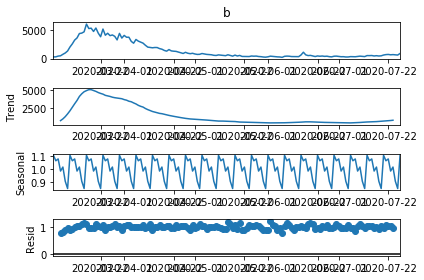

In [87]:
#Seasonal decomposition of Nowcast values not smoothed
import statsmodels.tsa.seasonal as seasonal
nowcast.b[nowcast.index == dt.datetime(2020,6,15)] = 500
nowcast.b[nowcast.index == dt.datetime(2020,6,16)] = 500
nowcast.b[nowcast.index == dt.datetime(2020,6,17)] = 500
result_b = seasonal.seasonal_decompose(nowcast.b,model="multiplicative")
result_b.observed[result_b.observed.index == dt.datetime(2020,6,15)] = 645
result_b.observed[result_b.observed.index == dt.datetime(2020,6,16)] = 1123
result_b.observed[result_b.observed.index == dt.datetime(2020,6,17)] = 669
plot = result_b.plot()

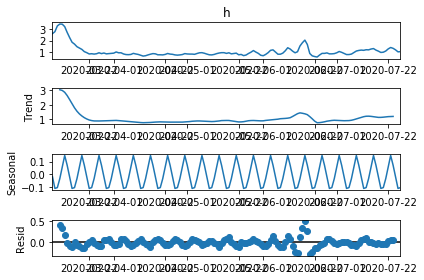

In [88]:
#Decomposition of 4-day R values not smoothed
result_f = seasonal.seasonal_decompose(nowcast.h[5:],model="additive")
plot = result_f.plot()

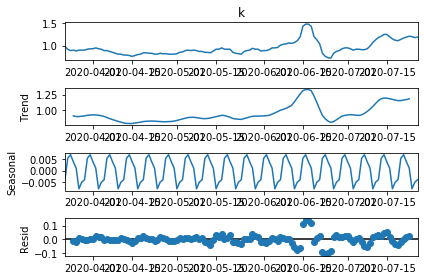

In [89]:
#Decomposition of 7-day R values not smoothed
result_s = seasonal.seasonal_decompose(nowcast.k[20:-1],model="additive")
plot = result_s.plot()

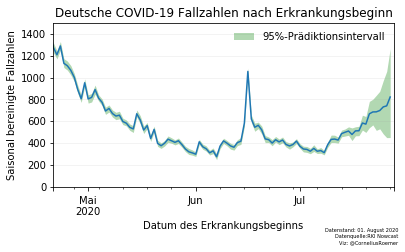

In [90]:
left_end=50
adjusted_b = result_b.observed / result_b.seasonal
adjusted_c = nowcast.c[left_end:] / result_b.seasonal
adjusted_d = nowcast.d[left_end:] / result_b.seasonal

locale.setlocale(locale.LC_ALL, 'de_DE')

fig = plt.figure(num=None, figsize=(6.75, 3.5), facecolor='w', edgecolor='k')

ax = adjusted_b[2:].plot()
ax.fill_between(adjusted_b.index,adjusted_c,adjusted_d,color='g',alpha=0.3,lw=0,zorder=0)
ax.set_xlim(left=nowcast.index[left_end],right=nowcast.index[-1]+pd.Timedelta(days=1))
ax.set_ylim(top=1500,bottom=0)
red_patch = mpatches.Patch(color='green', alpha=0.3, label='95%-Prädiktionsintervall',ec=None)
ax.legend(handles=[red_patch],frameon=False)
plt.title("Deutsche COVID-19 Fallzahlen nach Erkrankungsbeginn")
plt.ylabel("Saisonal bereinigte Fallzahlen")
plt.xlabel("Datum des Erkrankungsbeginns")
ax.tick_params(axis='x', which='major', pad=5)
plt.grid(axis = 'y', b=True, which='major', color='#999999', linestyle='-', alpha=0.15,zorder=-1)
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.25)
fig.text(0.91, 0.02, "Datenstand: " + today + "\nDatenquelle:RKI Nowcast\nViz: @CorneliusRoemer", size=5, va="bottom", ha="right")
plt.savefig('CasesNear.png',dpi=300)

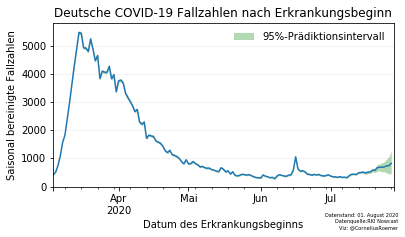

In [91]:
adjusted_b = result_b.observed / result_b.seasonal
adjusted_c = nowcast.c[10:] / result_b.seasonal
adjusted_d = nowcast.d[10:] / result_b.seasonal

locale.setlocale(locale.LC_ALL, 'de_DE')

fig = plt.figure(num=None, figsize=(6.75, 3.5), facecolor='w', edgecolor='k')

ax = adjusted_b[2:].plot()
ax.fill_between(adjusted_b.index,adjusted_c,adjusted_d,color='g',alpha=0.3,lw=0,zorder=0)
ax.set_xlim(right=nowcast.index[-1]+pd.Timedelta(days=1))
#ax.set_ylim(top=5000,bottom=0)
red_patch = mpatches.Patch(color='green', alpha=0.3, label='95%-Prädiktionsintervall',ec=None)
ax.legend(handles=[red_patch],frameon=False)
plt.title("Deutsche COVID-19 Fallzahlen nach Erkrankungsbeginn")
plt.ylabel("Saisonal bereinigte Fallzahlen")
plt.xlabel("Datum des Erkrankungsbeginns")
#ax.tick_params(axis='x', which='major', pad=-5)
plt.grid(axis = 'y', b=True, which='major', color='#999999', linestyle='-', alpha=0.15,zorder=-1)
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.25)
fig.text(0.91, 0.08, "Datenstand: " + today + "\nDatenquelle:RKI Nowcast\nViz: @CorneliusRoemer", size=5, va="bottom", ha="right")
plt.savefig('CasesAll.png',dpi=400)

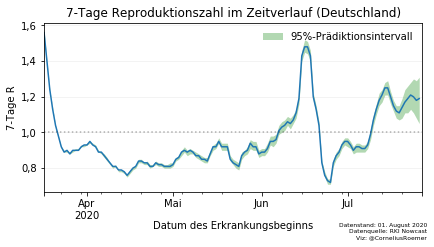

In [94]:
start=15
locale.setlocale(locale.LC_ALL, 'de_DE')
locale.setlocale(locale.LC_NUMERIC, 'de_DE')
plt.rcParams['axes.formatter.use_locale'] = True
fig = plt.figure(num=None, figsize=(7, 3.5), facecolor='w', edgecolor='k')
ax = nowcast.k[start:-1].plot(zorder=1)
ax.fill_between(nowcast.index[start:-1],nowcast.l[start:-1],nowcast.m[start:-1],color='g',alpha=0.3,lw=0,zorder=0)
ax.set_xlim(right=nowcast.index[-2]+pd.Timedelta(days=1))
plt.title("7-Tage Reproduktionszahl im Zeitverlauf (Deutschland)")
plt.ylabel("7-Tage R")
plt.xlabel("Datum des Erkrankungsbeginns",labelpad=0)
red_patch = mpatches.Patch(color='green', alpha=0.3, label='95%-Prädiktionsintervall',ec=None)
ax.legend(handles=[red_patch],frameon=False)
ax.axhline(1,c='black',ls=':',alpha=0.3)
#ax.tick_params(axis='x', which='major', pad=-10)
plt.grid(axis = 'y', b=True, which='major', color='#999999', linestyle='-', alpha=0.15,zorder=-1)
fig.text(0.91, 0.04, "Datenstand: " + today + "\nDatenquelle: RKI Nowcast\nViz: @CorneliusRoemer", size=6, va="bottom", ha="right")
plt.subplots_adjust(left=0.15, right=0.9, top=0.9, bottom=0.23)
plt.savefig('7rNear.png',dpi=400)

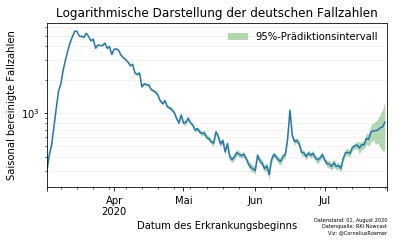

In [96]:
adjusted_b = result_b.observed / result_b.seasonal
adjusted_c = nowcast.c[0:] / result_b.seasonal
adjusted_d = nowcast.d[0:] / result_b.seasonal

locale.setlocale(locale.LC_ALL, 'de_DE')

fig = plt.figure(num=None, figsize=(6.75, 3.5), facecolor='w', edgecolor='k')

ax = adjusted_b[0:].plot()
ax.fill_between(adjusted_b.index,adjusted_c,adjusted_d,color='g',alpha=0.3,lw=0,zorder=0)
#ax.set_xlim(left=nowcast.index[1])
ax.set_xlim(left=nowcast.index[1],right=nowcast.index[-1]+pd.Timedelta(days=1))
#ax.set_ylim(top=1500,bottom=0)
plt.yscale('log')
red_patch = mpatches.Patch(color='green', alpha=0.3, label='95%-Prädiktionsintervall',ec=None)
ax.legend(handles=[red_patch],frameon=False)
plt.title("Logarithmische Darstellung der deutschen Fallzahlen")
plt.ylabel("Saisonal bereinigte Fallzahlen")
plt.xlabel("Datum des Erkrankungsbeginns")
ax.tick_params(axis='x', which='major', pad=5)
plt.grid(axis = 'y', b=True, which='both', color='#999999', linestyle='-', alpha=0.15,zorder=-1)
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.25)
fig.text(0.90, 0.06, "Datenstand: " + today + "\nDatenquelle: RKI Nowcast\nViz: @CorneliusRoemer", size=5, va="bottom", ha="right")
plt.savefig('CasesLog.png',dpi=400)

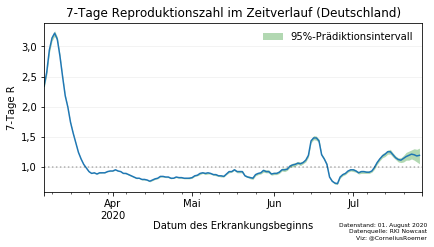

In [93]:
start=4
locale.setlocale(locale.LC_ALL, 'de_DE')
locale.setlocale(locale.LC_NUMERIC, 'de_DE')
plt.rcParams['axes.formatter.use_locale'] = True
fig = plt.figure(num=None, figsize=(7, 3.5), facecolor='w', edgecolor='k')
ax = nowcast.k[start:-1].plot(zorder=1)
ax.fill_between(nowcast.index[start:-1],nowcast.l[start:-1],nowcast.m[start:-1],color='g',alpha=0.3,lw=0,zorder=0)
ax.set_xlim(right=nowcast.index[-2]+pd.Timedelta(days=1))
plt.title("7-Tage Reproduktionszahl im Zeitverlauf (Deutschland)")
plt.ylabel("7-Tage R")
plt.xlabel("Datum des Erkrankungsbeginns",labelpad=0)
red_patch = mpatches.Patch(color='green', alpha=0.3, label='95%-Prädiktionsintervall',ec=None)
ax.legend(handles=[red_patch],frameon=False)
ax.axhline(1,c='black',ls=':',alpha=0.3)
#ax.tick_params(axis='x', which='major', pad=-10)
plt.grid(axis = 'y', b=True, which='major', color='#999999', linestyle='-', alpha=0.15,zorder=-1)
fig.text(0.91, 0.04, "Datenstand: " + today + "\nDatenquelle: RKI Nowcast\nViz: @CorneliusRoemer", size=6, va="bottom", ha="right")
plt.subplots_adjust(left=0.15, right=0.9, top=0.9, bottom=0.23)
plt.savefig('7rAll.png',dpi=400)

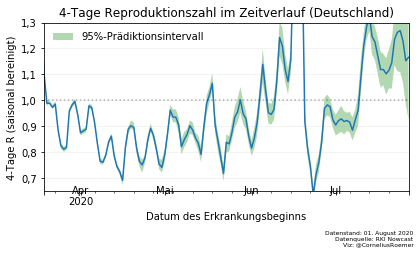

In [95]:
adjusted_b = result_f.observed - result_f.seasonal
adjusted_c = nowcast.i[5:] - result_f.seasonal
adjusted_d = nowcast.j[5:] - result_f.seasonal

adjusted_b
locale.setlocale(locale.LC_ALL, 'de_DE')

fig = plt.figure(num=None, figsize=(6.75, 3.5), facecolor='w', edgecolor='k')

ax = adjusted_b[2:].plot()
ax.fill_between(adjusted_b.index,adjusted_c,adjusted_d,color='g',alpha=0.3,lw=0,zorder=0)
ax.set_xlim(left=nowcast.index[17])
ax.set_ylim(top=1.3,bottom=0.65)
plt.title("4-Tage Reproduktionszahl im Zeitverlauf (Deutschland)")
plt.ylabel("4-Tage R (saisonal bereinigt)")
plt.xlabel("Datum des Erkrankungsbeginns",labelpad=5)
red_patch = mpatches.Patch(color='green', alpha=0.3, label='95%-Prädiktionsintervall',ec=None)
ax.legend(handles=[red_patch],frameon=False)
ax.axhline(1,c='black',ls=':',alpha=0.3)
ax.tick_params(axis='x', which='major', pad=-10)
plt.grid(axis = 'y', b=True, which='major', color='#999999', linestyle='-', alpha=0.15,zorder=-1)
fig.text(0.91, 0.01, "Datenstand: " + today + "\nDatenquelle: RKI Nowcast\nViz: @CorneliusRoemer", size=6, va="bottom", ha="right")
plt.subplots_adjust(left=0.15, right=0.9, top=0.9, bottom=0.23)
plt.savefig('4r.png',dpi=300)

In [23]:
adjusted_b

a
2020-03-02    275.070724
2020-03-03    290.997857
2020-03-04    417.681232
2020-03-05    515.715704
2020-03-06    760.676208
                 ...    
2020-07-10    442.230394
2020-07-11    446.318452
2020-07-12    443.429126
2020-07-13    580.001099
2020-07-14    662.677363
Length: 135, dtype: float64

/Users/cornelius/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


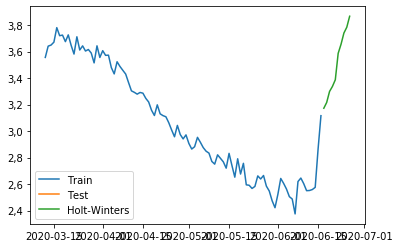

In [90]:
import statsmodels.api as sm
import numpy as np
nowcast.index.freq = 'D'
nowcast['log_b'] = np.log10(nowcast['b'])
train,test = nowcast['log_b'][10:], nowcast['log_b'][-1:]
model = sm.tsa.statespace.ExponentialSmoothing(train, trend=True,seasonal=7).fit()
pred = model.predict(start=test.index[0]+1, end=test.index[-1]+10)
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')

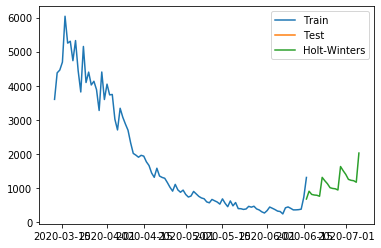

In [91]:

nowcast.index.freq = 'D'
train,test = nowcast['b'][10:], nowcast['b'][-1:]
model = hw.ExponentialSmoothing(train, trend='mul', seasonal='mul', damped=True, seasonal_periods=7).fit()
pred = model.predict(start=test.index[0], end=test.index[-1]+20)
plt.plot(train.index, train, label='Train')po
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')

In [32]:
pred = model.get_forecast(1)
print(pred.predicted_mean)
pred.se_mean

2020-06-15    2.57303
Freq: D, dtype: float64


2020-06-15    0.047917
Freq: D, dtype: float64

In [33]:
adjusted_b = result_f.observed - result_f.seasonal
adjusted_b

a
2020-03-07    2.586860
2020-03-08    2.834662
2020-03-09    3.292684
2020-03-10    3.408218
2020-03-11    3.335769
                ...   
2020-06-10    0.965769
2020-06-11    1.125055
2020-06-12    1.066750
2020-06-13    0.946860
2020-06-14    0.944662
Length: 100, dtype: float64

In [34]:
nowcast.i[20:] - result_f.seasonal

a
2020-03-07         NaN
2020-03-08         NaN
2020-03-09         NaN
2020-03-10         NaN
2020-03-11         NaN
                ...   
2020-06-10    0.865769
2020-06-11    0.995055
2020-06-12    0.936750
2020-06-13    0.806860
2020-06-14    0.764662
Length: 100, dtype: float64

In [35]:
nowcast.j[20:] - result_f.seasonal

a
2020-03-07         NaN
2020-03-08         NaN
2020-03-09         NaN
2020-03-10         NaN
2020-03-11         NaN
                ...   
2020-06-10    1.075769
2020-06-11    1.295055
2020-06-12    1.226750
2020-06-13    1.106860
2020-06-14    1.144662
Length: 100, dtype: float64

In [36]:
adjusted_g = result_g.observed - result_f.seasonal
adjusted_g

NameError: name 'result_g' is not defined

In [193]:
#What I didn't recover yet: own R calculation and exponential smoothing

In [68]:
nowcast.a

a
2020-03-02   2020-03-02
2020-03-03   2020-03-03
2020-03-04   2020-03-04
2020-03-05   2020-03-05
2020-03-06   2020-03-06
                ...    
2020-05-25   2020-05-25
2020-05-26   2020-05-26
2020-05-27   2020-05-27
2020-05-28   2020-05-28
2020-05-29   2020-05-29
Name: a, Length: 89, dtype: datetime64[ns]